# Autor: Leonardo Padilha de Lima

## Desafio TOTVS

### Resposta das questões:

#### 1 - Casos de uso possíveis para este dataset:
<p>    A- Sistema para Previsão de vendas por Vendedor, Canal, Produto, Período, Grupo de clientes e Segmento de clientes.
<p>    B- Sistema para Clusterização
<p>    C- Sistema para Estimativa de Churn (Perda de clientes)
<p>   D- Ranqueamento de vendas por Vendedor, Canal, Produtos, Períodos, Grupos de CLientes e Segmento de clientes.
<p>   E- Sistema de recomenção de produtos para os clientes. 

#### 2 - Escolhi criar o modelo preditivo para fazer Estimava de Churn, ou seja, predizer quais clientes podem deixar de ser nossos clientes com base em seus comportamentos. Com base nas informações que o modelo irá nos fornecer, outras área da empresa poderão tomar ações direcionadas, visando evitar ou minimizar a perda destes clientes.  

### As respostas para as questões 3 e 4, estão contidas nas explicações passo a passo deste jupyter.


### 1- Imporanto as bibliotecas básicas e leitura do dataset

In [1]:
# Importação das bibliotecas básicas

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Fazendo a leitura do dataset

df = pd.read_json('challenge.json')
df.head()

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,0,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,0,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,0,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0


In [3]:
# Verificando informações básicas dos dataset.
# Nomes e tipos dos dados
# Qtde de registros e dimensão

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
customer_code       204428 non-null int64
branch_id           204428 non-null int64
sales_channel       204428 non-null int64
seller_code         204428 non-null int64
register_date       204428 non-null object
total_price         204428 non-null float64
order_id            204428 non-null int64
quantity            204428 non-null int64
item_code           204428 non-null int64
item_total_price    204428 non-null float64
unit_price          204428 non-null float64
group_code          204428 non-null int64
segment_code        204428 non-null int64
is_churn            202513 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 21.8+ MB


### 2- Tratamento e exploração dos dados

Filial x Qtde Pedidos:
 0    204428
Name: branch_id, dtype: int64


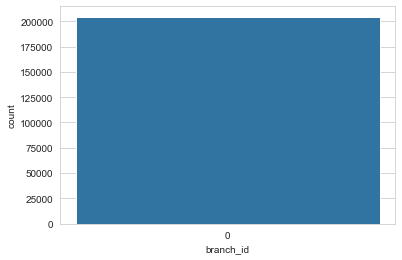

In [4]:
# Verificando as compras por filial 
# Todas as compras dataset foram realizados na filial 0(zero).

print('Filial x Qtde Pedidos:\n', df.branch_id.value_counts())
sns.countplot(x='branch_id',data=df)

Canal Vendas x Qtde Pedidos:
 0    103960
1     47961
6     25960
7     11355
2      6068
Name: sales_channel, dtype: int64


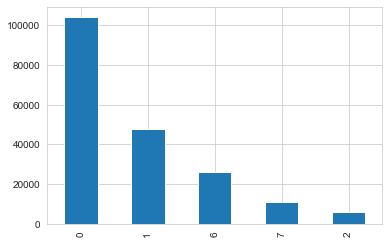

In [5]:
# Foram detectados 106(cento e seis) canais de vendas
# Visualizamos os 5 maiores canais e o canal 0(zero) é o que contém a grande maioria dos clientes.

print('Canal Vendas x Qtde Pedidos:\n', df.sales_channel.value_counts().head())
df.sales_channel.value_counts().head().plot(kind='bar',)

Vendedor x Qtde:
 190    10678
177    10021
171     7010
3       6776
27      5821
Name: seller_code, dtype: int64


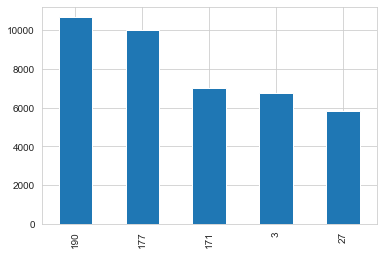

In [6]:
# Foram detectados 290(duzentos e noventa) vendedores.
# Visualizamos os 5 maiores vendedores e o vededor 190(cento e noventa) foi o que realizou a maioria das vendas.

print('Vendedor x Qtde:\n', df.seller_code.value_counts().head())
df.seller_code.value_counts().head().plot(kind='bar',)

Grupo x Qtde:
 0    170164
2     24703
1      7646
3      1915
Name: group_code, dtype: int64


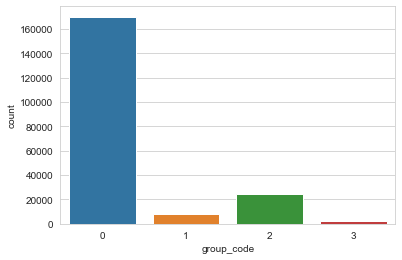

In [7]:
# Existe 4(quatro) grupos de clientes e que o grupo 0(zero) é o que contém a grande maioria dos clientes. 

print('Grupo x Qtde:\n', df.group_code.value_counts().head())
#df.group_code.value_counts().head().plot(kind='bar')
sns.countplot(x='group_code',data=df)

Segmento x Qtde:
 0    150223
2     24703
5     10566
3      7824
4      4878
Name: segment_code, dtype: int64


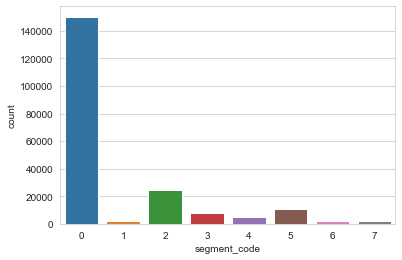

In [8]:
# Existem 7(sete) segmentos de clientes e o segmento 0(zero), é o que contém a grande maioria dos clientes  

print('Segmento x Qtde:\n', df.segment_code.value_counts().head())
sns.countplot(x='segment_code',data=df)

Classe x Qtde:
 0.0    163799
1.0     38714
Name: is_churn, dtype: int64


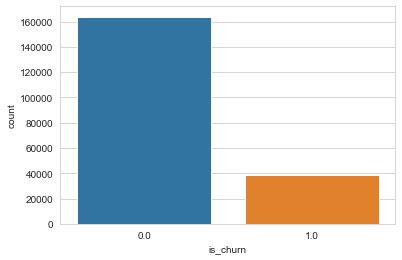

In [9]:
'''
Como eu escolhi fazer um modelo para a estimativa de churn, a coluna "is_churn" é a que contém as variáveis dependentes.

Verificando os valores desta variável, percebe-se que a base está desbalanceada, o que pode levar o nosso modelo
a aprender mais sobre o comportamento de uma classe em detrimendo da outra, tornando nosso modelo enviesado e consequentemente
menos preciso. 
Trataremos este problema quando formos preparar os dados para o modelo.

''' 
# Existem mais classes 0(zero) do que 1(um).
# O que é muito bom, temos muito mais clientes não perdidos, do que perdidos.

print('Classe x Qtde:\n', df.is_churn.value_counts())
sns.countplot(x='is_churn',data=df)


In [10]:
# Existem 1915 valores faltantes na coluna is_churn
# Estas linhas serão retiradas no dataset quando formos criar nosso modelo
# Não é uma das melhores soluções mas faremos deste jeito neste desafio.

df.isnull().sum()

customer_code          0
branch_id              0
sales_channel          0
seller_code            0
register_date          0
total_price            0
order_id               0
quantity               0
item_code              0
item_total_price       0
unit_price             0
group_code             0
segment_code           0
is_churn            1915
dtype: int64

In [11]:
# Existem 53 linhas com valores duplicados
# É interessante verificar o que levou a criação destes dados duplicados.
# Estes valores também serão retirados do dataset quando formos criar o modelo

df.duplicated().sum()


53

In [12]:
# Esses são os dados que estão duplicados no dataset, necessário verificar o que aconteceu.
# Para este desafio, vou apenas excluir esses dados que estão duplicados.

df[df.duplicated() == True].sort_values(by=['customer_code','seller_code','total_price','item_code'])

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
132987,114,0,2,86,2014-07-15T00:00:00Z,1106.85,12635,1,413,1.30,1.30,2,2,1.0
188485,114,0,2,86,2014-07-15T00:00:00Z,1106.85,12635,1,413,1.30,1.30,2,2,1.0
187129,114,0,2,86,2014-07-15T00:00:00Z,1106.85,12635,1,539,9.21,9.21,2,2,1.0
120573,114,0,16,130,2009-05-21T00:00:00Z,1037.08,1911,1,622,575.44,513.79,2,2,1.0
127103,114,0,2,261,2009-08-24T00:00:00Z,185.05,2342,1,814,5.55,5.55,2,2,1.0
39313,114,0,2,273,2012-12-11T00:00:00Z,780.56,9038,1,1027,37.96,37.96,2,2,1.0
36547,114,0,2,273,2014-03-05T00:00:00Z,1090.46,11878,1,862,6.20,6.20,2,2,1.0
102635,114,0,2,273,2012-03-22T00:00:00Z,1705.82,7367,1,715,89.59,89.59,2,2,1.0
152439,128,0,1,212,2009-11-20T00:00:00Z,5.54,2759,2,1947,1.47,0.64,0,0,0.0
88868,158,0,0,50,2015-10-04T00:00:00Z,47.14,15469,1,934,1.14,0.99,0,0,0.0


### 3- PREPARANDO DADOS PARA MODELO

Agora vamos para a etapa de preparação dos dados para o modelo.
Eu escolhi o algoritmo XGBoost, que é possue um desempenho muito bom e é baseado em árvores de decisão sequênciais.
Diferentemente do Random Forest que também é baseado em árvores, mas não sequenciais.
Optei por não utilizar redes neurais pois o conjunto de dados não é tão grande e também pelo fato das redes neurais
necessitarem de mais recursos computacionais.

<p>1- Precisamos excluir as linhas com dados faltantes.
<p>2- Excluir linhas com dados duplicados
<p>3- Separar a variável dependende das independentes. (X e y)
<p>4- Balancear a base de treino


In [13]:
# Excluindo linhas com dados faltantes

df.dropna(inplace=True)
df.isnull().sum()

customer_code       0
branch_id           0
sales_channel       0
seller_code         0
register_date       0
total_price         0
order_id            0
quantity            0
item_code           0
item_total_price    0
unit_price          0
group_code          0
segment_code        0
is_churn            0
dtype: int64

In [14]:
# Exluindo as linhas duplicadas

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
# Vou excluir as colunas "register_date", "total_price", item_total_price, order_id pois não serão importantes para a criação 
# do modelo.

df.drop(['register_date','total_price','item_total_price','order_id'], inplace=True, axis=1)

In [16]:
# Separando as variável X e y e balanceando os dataset´s para que fiquem com o mesmo número de classe, evitando o enviesamento
# Necessário instalar o pacote 

#%pip install imblearn

from imblearn.under_sampling import NearMiss

nr = NearMiss()
X = df.iloc[:,:-1].values
y = df.is_churn.values
X, y = nr.fit_sample(X, y)

In [17]:
# Separando dados de treino e teste para validar o modelo 70% e 30%, respectivamente.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 4- CRIANDO MODELO E TREINANDO

In [18]:
# Impostanto a bibliotecas para criação do modelo

import xgboost
from xgboost import plot_importance

In [19]:
# Criando o modelo

modelo = xgboost.XGBClassifier()

In [20]:
# Ajustando o modelo aos dados

modelo.fit(X_train,y_train)

y_pred= modelo.predict(X_test)

### 5- AVALIANDO DESEMPENHO DO MODELO

In [21]:
# Métricas de desempenho
# Importando os pacotes

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

# Acurária
accur = metrics.accuracy_score(y_test, y_pred)*100
print(f'ACURÁCIA:{accur:.2f}%')

ACURÁCIA:99.98%


Ou seja, nosso modelo consegue predizer com 99.98% de precisão, sobre um possível caso de churn entre nossos clientes.
Esta informação é de extrema relevância pois os departamentos responsáveis poderão tomar ações para evitar que estes casos realmente se concretizem.

In [22]:
# Relatório de Classificação

print('RELATÓRIO:\n',metrics.classification_report(y_test, y_pred))

RELATÓRIO:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11642
         1.0       1.00      1.00      1.00     11566

    accuracy                           1.00     23208
   macro avg       1.00      1.00      1.00     23208
weighted avg       1.00      1.00      1.00     23208



In [23]:
# Matriz de confusão

print('MATRIZ DE CONFUSÃO:\n\n', metrics.confusion_matrix(y_test, y_pred))

MATRIZ DE CONFUSÃO:

 [[11639     3]
 [    1 11565]]


Esta matriz de confusão nos mostra que, o modelo foi capaz de acertar 11529 (VP) casos de churn e errar apenas 2 (FP). E dos casos que o modelo previu que não seriam churn, ele acertou 11674 (VN) e errou apenas 3 (FN).

<p>VP- Verdadeiro positivo
<p>FP- Falso Positivo
<p>VN- Verdadeiro Negativo
<p>FN- Falso Negativo

In [24]:
# Métrica LOG LOSS
# Mede quão bom está o modelo.

modelo_probs = modelo.predict_proba(X_test)
log = log_loss(y_test, modelo_probs)
print(f'LOG LOSS:{log:.3f}')


LOG LOSS:0.003


In [25]:
# Curva ROC

auc= roc_auc_score(y_test, y_pred)*100 
print(f'AUC:{auc:.2f}%')

AUC:99.98%


In [26]:
## CROSS VALIDATION 

results = cross_val_score(modelo, X, y, cv=10)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 99.92% (0.15%)


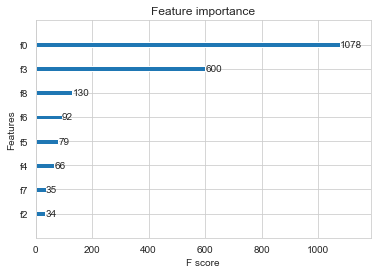

In [27]:
# Verificando as features que possuem maior relevância para o modelo.

plot_importance(modelo)

### Podemos melhorar?

Sim! Sempre podemos melhorar. Eu optei por não utilizar ajustes de hyper parametros (Tunning) pois consegui resultados muito bons mas daria para melhorar o código com funções que ajustem o modelo automaticamente através do "GridSearch".
Também poderíamos aplicar redução de dimensionalidade, diminuindo o números das variáveis independentes.
Poderiamos estudar mais o comportamento das variáveis e identificar muito mais insights.
Como sempre ouço, os dados são o novo petróleo, temos um tesouro nas nossas mãos, e a ciência de dados nos ensina a tirar informações relevantes destes dados.

#### Espero ter podido mostrar um pouco do meu trabalho e alcançado sucesso neste desafio.
#### Grande abraço e sucesso à todos!!

#### Leonardo Padilha de Lima 
#### (15) 99738-3447
#### leo.plima08@gmail.com